# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [99]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [100]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [101]:
chipo['item_name'].value_counts().head(5)

,count
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


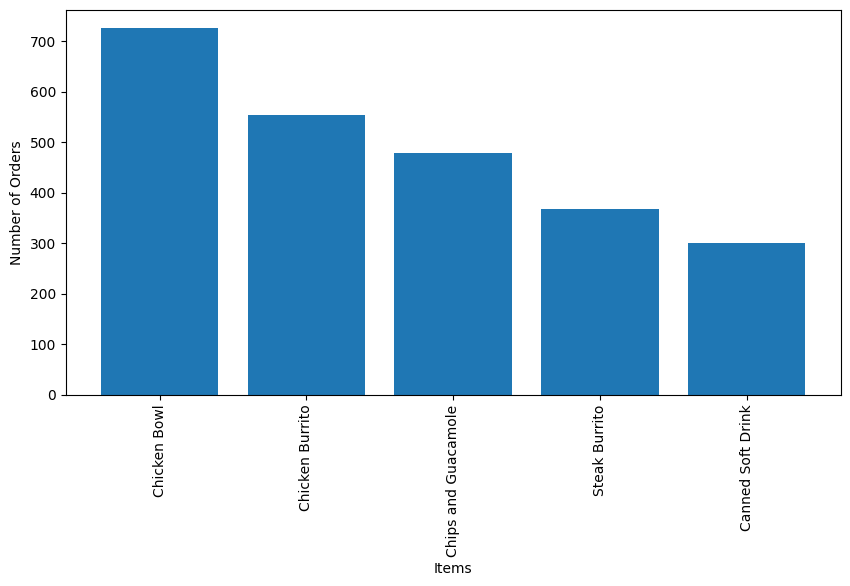

In [102]:
plt.figure(figsize=(10,5))
top5_items=chipo['item_name'].value_counts().head(5)
plt.bar(x=top5_items.index, height=top5_items)
plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

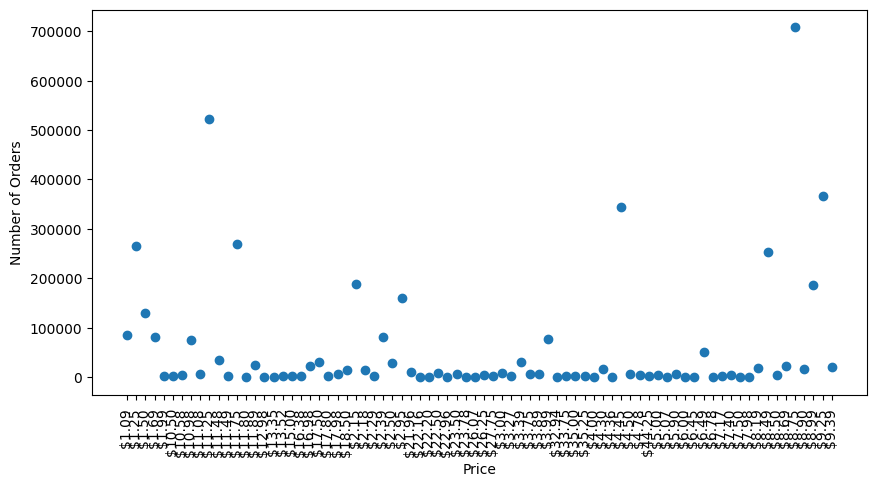

In [103]:
orders=chipo.groupby('item_price').sum()
orders.head()

plt.figure(figsize=(10,5))
plt.scatter(x=orders.index, y=orders['order_id'])
plt.xticks(rotation=90)
plt.xlabel('Price')
plt.ylabel('Number of Orders')
plt.show()

- 답안

(0.0, 36.7)

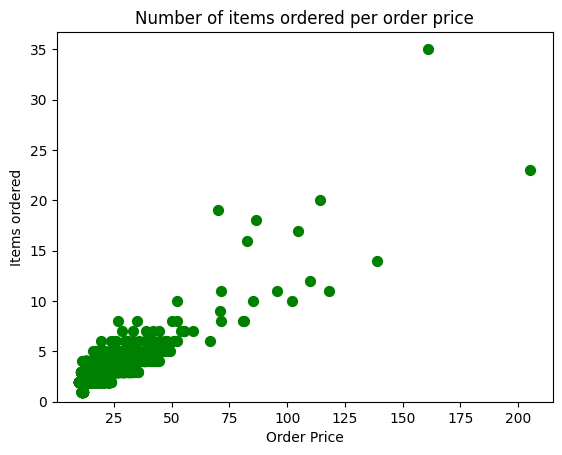

In [104]:
# create a list of prices
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]  # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.

가장 주문건수가 많은 주문 50개와 그 건수를 barplot으로 시각화한 후,
가장 주문건수가 많은 주문 5개의 주문건수와 주문금액총합을 각각 barplot으로 시각화하여 비교하시오.

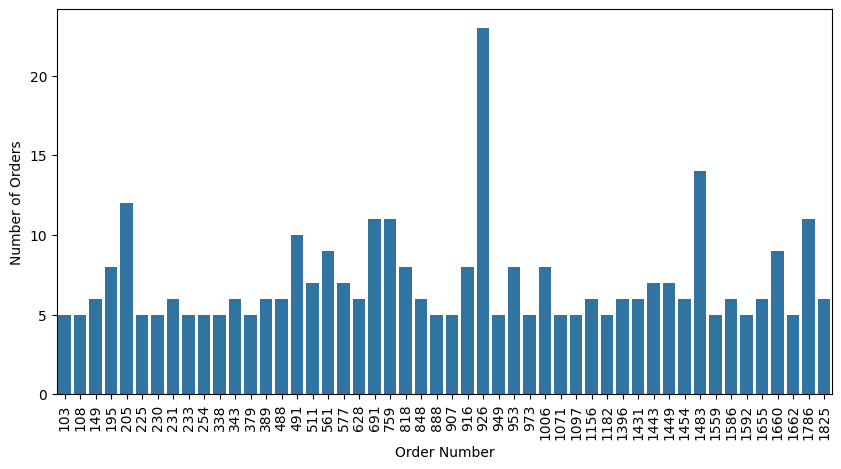

In [105]:
import seaborn as sns
top5_order_num=chipo['order_id'].value_counts().head(50)
plt.figure(figsize=(10,5))
sns.barplot(x=top5_order_num.index, y=top5_order_num)
plt.xticks(rotation=90)
plt.xlabel('Order Number')
plt.ylabel('Number of Orders')
plt.show()

가장 주문 건수가 많은 주문 5개의 주문 건수(개)와 주문금액의 합($)

In [106]:
new_index=chipo['order_id'].value_counts().index
new_index

Index([ 926, 1483,  205,  759, 1786,  691,  491,  561, 1660,  916,
       ...
       1036, 1634,  474, 1640, 1374,  768,  341, 1048,   94, 1199],
      dtype='int64', name='order_id', length=1834)

In [108]:
chipo['item_price']=chipo['item_price'].replace('$','').astype('float')
item_price_sum=chipo.groupby('order_id')['item_price'].sum()
top5_order_price=item_price_sum.loc[new_index].head(5)
top5_order_price

,item_price
order_id,
926,205.25
1483,139.00
205,109.90
759,86.30
1786,114.30


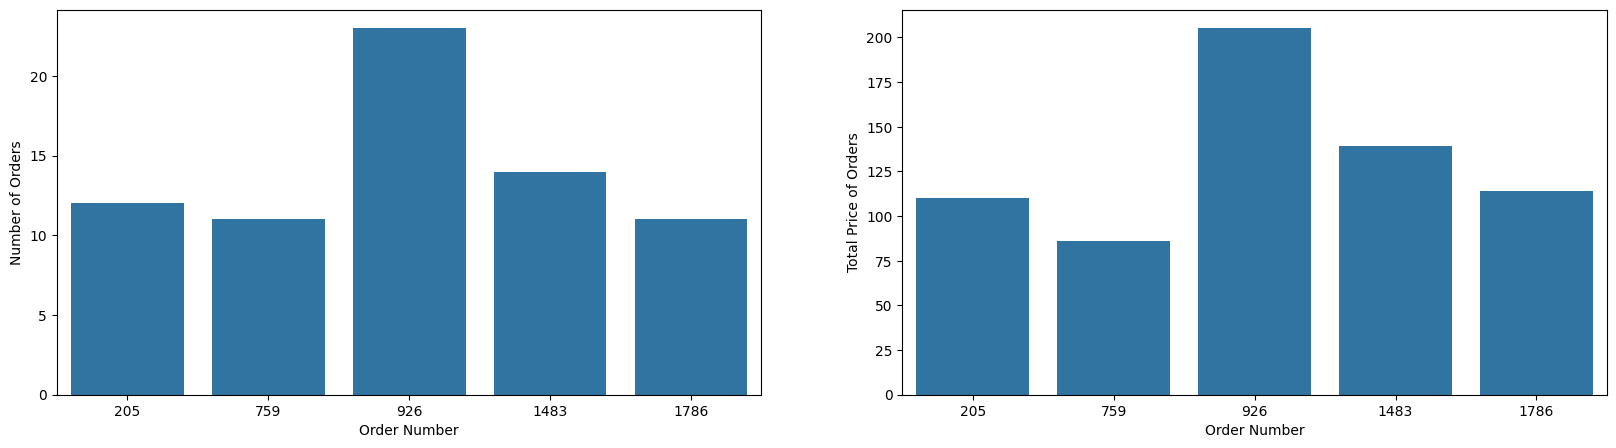

In [109]:
top5_order_num=chipo['order_id'].value_counts().head(5)
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.barplot(x=top5_order_num.index, y=top5_order_num, ax=ax[0])
ax[0].set_xlabel('Order Number')
ax[0].set_ylabel('Number of Orders')
sns.barplot(x=top5_order_price.index, y=top5_order_price, ax=ax[1])
ax[1].set_xlabel('Order Number')
ax[1].set_ylabel('Total Price of Orders')

plt.show()

주문 건수가 많은 주문 순대로 주문금액의 합도 높은 것을 알 수 있다.
위의 예제 6번 답안을 통해서도 알수 있다.